# LOG REGRESSION CLASSIFIER #

## LIBRARY MODULES ##

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## DATA CLEANING ##

### READ IN DATA ### 
'Timestamp' of the data is not needed, so we will remove the column from the data set. We follow up with a check on the shape of the data set with a before and after shot.

In [82]:
# Read in the data
happiness = pd.read_csv('Wellbeing_and_lifestyle_data_Kaggle.csv', delimiter=',')
print('BEFORE\nRows: ', len(happiness))
print('Columns: ', len(happiness.columns), '\n')
happiness.head(3)
happiness = happiness.drop('Timestamp', axis=1) # Remove 'Timestamp' factor as it is not needed
happiness.head(3)
print('AFTER\nRows: ', len(happiness))
print('Columns: ', len(happiness.columns), '\n')

BEFORE
Rows:  15972
Columns:  24 

AFTER
Rows:  15972
Columns:  23 



### FREQUENCY DISTRIBUTIONS OF THE DATA ###

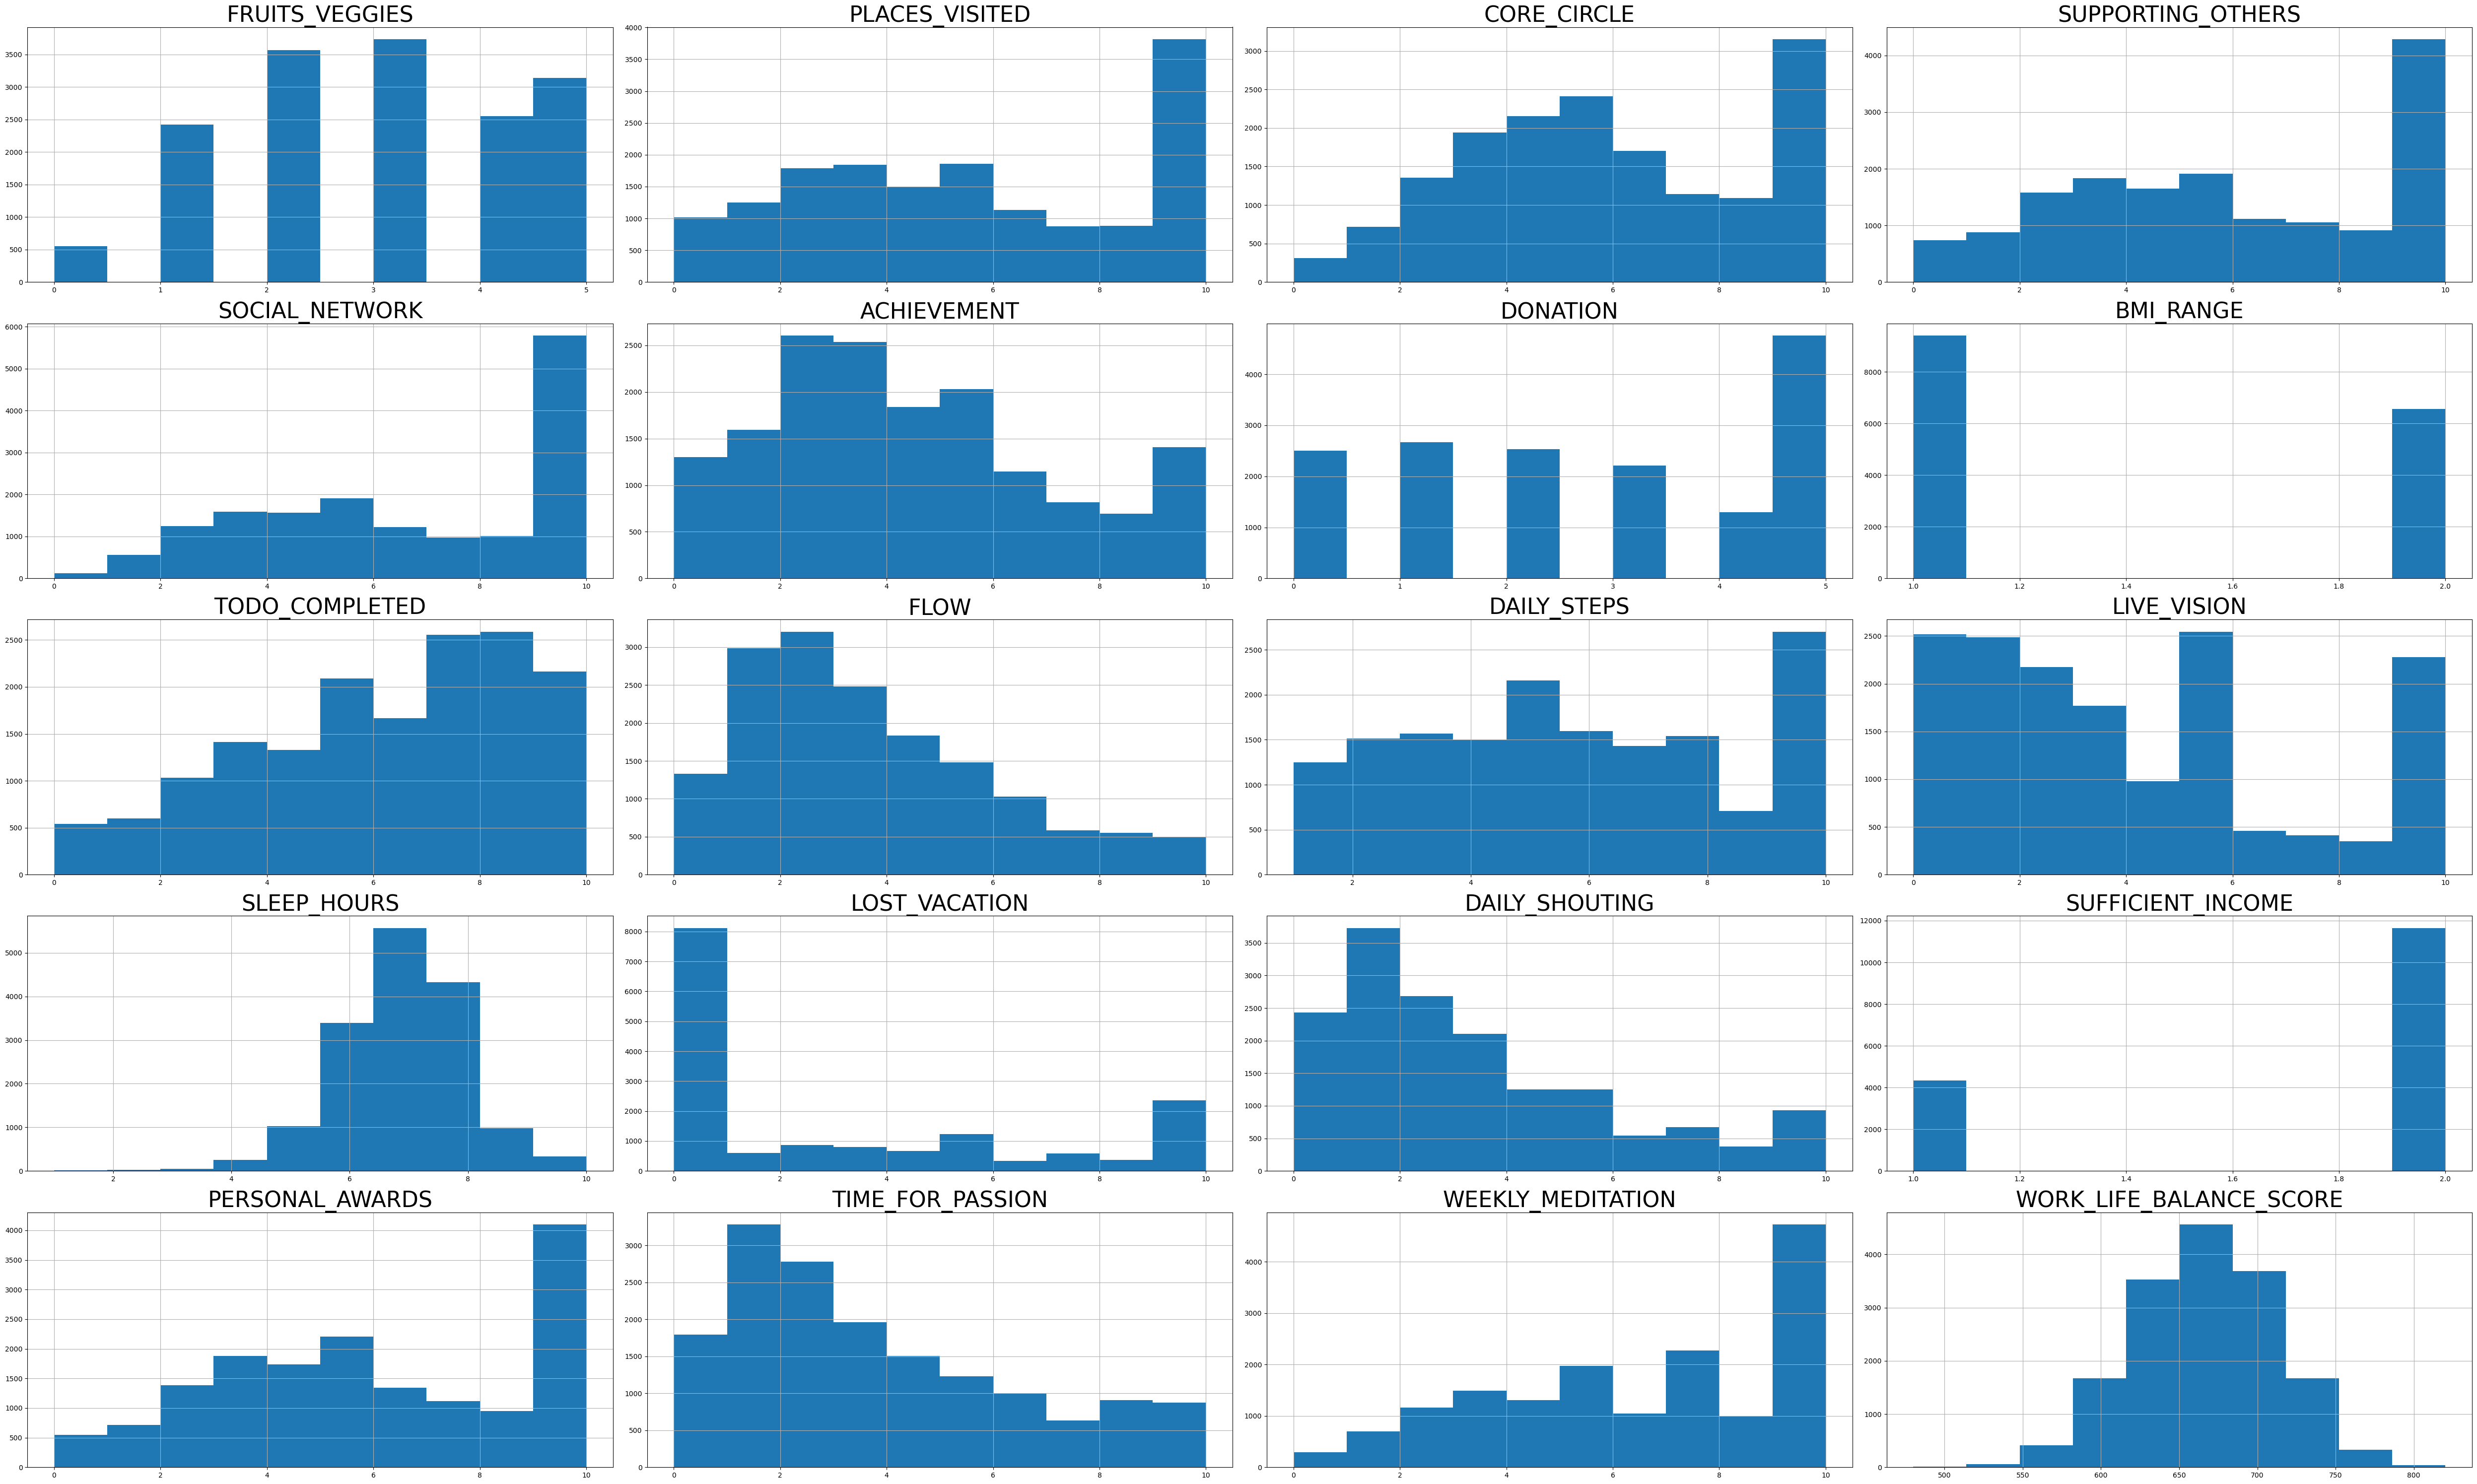

In [4]:
# Frequency distributions
fig = happiness.hist(figsize=(50, 30))
[x.title.set_size(32) for x in fig.ravel()]
plt.tight_layout()

## DAILY_STRESS not included in output
## AGE not included in output
## GENDER not included in output

### LET'S FIND OUT WHY?? ###

### EXAMINE DATA TYPES OF DATA SET ###

In [89]:
print(happiness.dtypes)
# Categorical data exists in the dataset

FRUITS_VEGGIES               int64
DAILY_STRESS                object
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                      object
WORK_LIFE_BALANCE_SCORE    float64
dtype: object


The data set clearly has three features [DAILY_STRESS, AGE, GENDER] that are python objects. These are likely strings.

### CODE SNIPPET BELOW RESETS ENCODED DATA SET FOR ITERATIVE RUNS OF THE NOTEBOOK ###

In [96]:
# clear out happiness_encoded df
happiness_encoded = happiness.copy(deep=True)

### ENCODE GENDER FROM STRING DTYPE TO INT DTYPE ###  
We use a module from sklearn that does this for us

In [99]:
# Encode GENDER - we will use a label encoder from sklearn package
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder_1 = LabelEncoder()

# Apply LabelEncoder to the 'AGE' column
happiness_encoded['GENDER'] = label_encoder_1.fit_transform(happiness['GENDER'])

# Let's take a look
# Display the mapping of categories to labels
print("Mapping of labels:")
for index, label in enumerate(label_encoder_1.classes_):
    print(f"{label} -> {index}")

Mapping of labels:
Female -> 0
Male -> 1


### EXAMINE DATA SET TO CONFIRM CHANGES ###

In [102]:
#What is the size of our characteristics of our dataframe now?
print('Rows: ', len(happiness_encoded))
print('Columns: ', len(happiness_encoded.columns), '\n')
print(happiness_encoded.dtypes)

Rows:  15972
Columns:  23 

FRUITS_VEGGIES               int64
DAILY_STRESS                object
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                       int32
WORK_LIFE_BALANCE_SCORE    float64
dtype: object


### ENCODE DAILY STRESS FROM STRING DTYPE TO INT DTYPE ###  
We first remove the entire row containing the date string '1/1/00' as this is clearly an error. We then examine the before and after 

In [106]:
# Remove rows where the 'Date' column contains '1/1/00'
happiness_encoded = happiness_encoded[happiness_encoded['DAILY_STRESS'] != '1/1/00']

# Encode DAILY_STRESS
# Convert all entries of DAILY_STRESS from 'string' to type 'int'
happiness_encoded['DAILY_STRESS'] = happiness_encoded['DAILY_STRESS'].astype(int)

### EXAMINE DATA SET TO CONFIRM CHANGES ###

In [10]:
#What is the size of our characteristics of our dataframe now?
print('Rows: ', len(happiness_encoded))
print('Columns: ', len(happiness_encoded.columns), '\n')
print(happiness_encoded.dtypes)

Rows:  15971
Columns:  23 

FRUITS_VEGGIES               int64
DAILY_STRESS                 int32
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                         object
GENDER                       int32
WORK_LIFE_BALANCE_SCORE    float64
dtype: object


### ENCODE AGE FROM STRING DTYPE TO INT DTYPE ### 
We use a module from sklearn that does this for us

In [115]:
# Encode AGE - we will use a label encoder from sklearn package
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder_2 = LabelEncoder()

# Apply LabelEncoder to the 'AGE' column
happiness_encoded['AGE'] = label_encoder_2.fit_transform(happiness_encoded['AGE'])

# Let's take a look
# Display the mapping of categories to labels
print("Mapping of labels:")
for index, label in enumerate(label_encoder_2.classes_):
    print(f"{label} -> {index}")

Mapping of labels:
21 to 35 -> 0
36 to 50 -> 1
51 or more -> 2
Less than 20 -> 3


### EXAMINE DATA SET TO CONFIRM CHANGES ###

In [119]:
#What is the size of our characteristics of our dataframe now?
print('Rows: ', len(happiness_encoded))
print('Columns: ', len(happiness_encoded.columns), '\n')
print(happiness_encoded.dtypes)

Rows:  15971
Columns:  23 

FRUITS_VEGGIES               int64
DAILY_STRESS                 int32
PLACES_VISITED               int64
CORE_CIRCLE                  int64
SUPPORTING_OTHERS            int64
SOCIAL_NETWORK               int64
ACHIEVEMENT                  int64
DONATION                     int64
BMI_RANGE                    int64
TODO_COMPLETED               int64
FLOW                         int64
DAILY_STEPS                  int64
LIVE_VISION                  int64
SLEEP_HOURS                  int64
LOST_VACATION                int64
DAILY_SHOUTING               int64
SUFFICIENT_INCOME            int64
PERSONAL_AWARDS              int64
TIME_FOR_PASSION             int64
WEEKLY_MEDITATION            int64
AGE                          int32
GENDER                       int32
WORK_LIFE_BALANCE_SCORE    float64
dtype: object


## MODELING ##  
We will now fit an OLS Regression model to our data set.

### SPLIT DATA SET UP INTO TRAINING AND TEST ###  
*test_size* - the percentage of the data set to be used as the test data set.  
*random_state* - the seed for the random generator.

In [146]:
# Split data into training and testing sets
X = happiness_encoded.drop('WORK_LIFE_BALANCE_SCORE', axis=1)
Y = happiness_encoded['WORK_LIFE_BALANCE_SCORE']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### FIT AN OLS REGRESSION MODEL ###

In [149]:
# Fit the OLS model on the training set
model = sm.OLS(Y_train, X_train).fit()

### MAKE PREDICTIONS FROM THE OLS REGRESSION MODEL ON THE TEST SET ###

In [152]:
# Predict on the test set
Y_pred = model.predict(X_test)

### CALCULATE THE ERROR BETWEEN PREDICTION AND ACTUAL ###

In [159]:
# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)

### OLS MODEL RESULTS ###

In [58]:
# Print results
print("Model Summary:\n", model.summary())
print("\nTest Set Predictions:\n", Y_pred)
print("\nMean Squared Error on Test Set:", mse)

Model Summary:
                                    OLS Regression Results                                   
Dep. Variable:     WORK_LIFE_BALANCE_SCORE   R-squared (uncentered):                   0.993
Model:                                 OLS   Adj. R-squared (uncentered):              0.993
Method:                      Least Squares   F-statistic:                          3.966e+04
Date:                     Sat, 29 Mar 2025   Prob (F-statistic):                        0.00
Time:                             08:30:29   Log-Likelihood:                         -34881.
No. Observations:                     6388   AIC:                                  6.981e+04
Df Residuals:                         6366   BIC:                                  6.995e+04
Df Model:                               22                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t    